## 第十六次课后练习-神经网络基本原理

**负责助教：王瑞环**

<span style="color:red; font-weight:bold;">请将作业文件命名为 第十六次课后练习+姓名+学号.ipynb, 例如 第十六次课后练习+张三+1000000000.ipynb</span>

<span style="color:red; font-weight:bold;">在作业过程中觉得有心得或者自己拓展学习到有价值内容的，可以在文件名最后加一个#号。例如第十六次课后练习+张三+1000000000+#.ipynb</span>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

## 第一部分 梯度下降法

请认真阅读代码，结合课件内容理解梯度下降法的基本原理与实现

100%|██████████| 1000/1000 [00:00<00:00, 54062.85it/s]

Final parameters: a=2.0644, b=0.9337, c=-1.2180
Final loss: 0.777193848290362


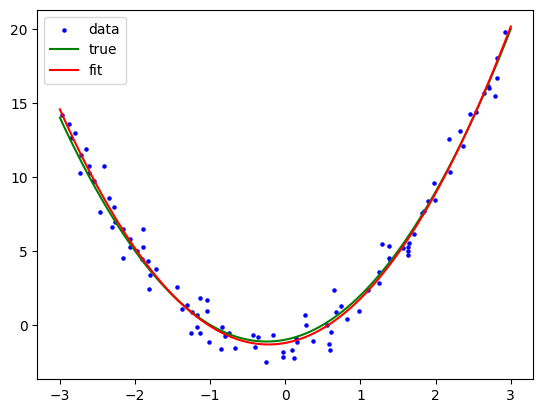

In [10]:
np.random.seed(42)

# 构建数据 y = 2x^2 + x - 1 + 噪声
x = np.random.uniform(-3, 3, size=(100, 1))
y = 2 * x**2 + x - 1 + np.random.normal(0, 1, size=(100, 1))
plt.scatter(x, y, label='data', color='blue', s=5)

# 用二次函数 y = ax^2 + bx + c 拟合数据点
a, b, c = np.random.rand(3)     # 初始化参数 a, b, c
lr, n_iter = 0.01, 1000         # 定义学习率和迭代次数

for i in tqdm(range(n_iter)):
    # 计算当前参数的预测值和真实值的均方误差作为损失函数
    y_pred = a * x**2 + b * x + c 
    loss = np.mean((y - y_pred)**2) 
    
    # 计算损失函数对各个参数的梯度
    da = -2 * np.mean((y - y_pred) * x**2)
    db = -2 * np.mean((y - y_pred) * x)
    dc = -2 * np.mean(y - y_pred) 

    # 梯度下降更新各个参数
    a -= lr * da 
    b -= lr * db 
    c -= lr * dc 

# 打印最终的参数和损失值，并绘制拟合曲线
print(f'Final parameters: a={a:.4f}, b={b:.4f}, c={c:.4f}')
print(f'Final loss: {loss}')
X = np.linspace(-3, 3, 100).reshape(-1, 1) 
y_pred = a * X**2 + b * X + c
y_true = 2 * X**2 + X - 1
plt.plot(X, y_true, label='true', color='green')
plt.plot(X, y_pred, label='fit', color='red')
plt.legend()
plt.show()

请仿照上述例子，选取合适的样本点数、学习率和迭代次数，通过梯度下降法使用三次函数拟合$\sin(x)$在$[-\pi, \pi]$上的取值

100%|██████████| 10000/10000 [00:00<00:00, 55203.10it/s]


Final parameters: a=-0.0955, b=0.0060, c=0.8607, d=-0.0193
Final loss: 0.011200125737554623


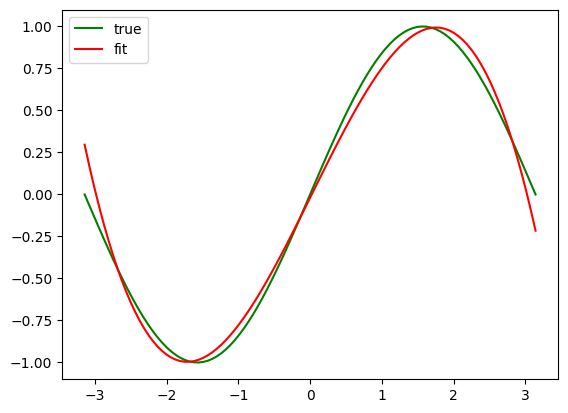

In [ ]:
np.random.seed(42)

x = np.random.uniform(-np.pi, np.pi, size=(100, 1))
y = np.sin(x) + np.random.normal(0, 0.1, size = (100, 1))
# plt.scatter(x, y, label='data', color='blue', s=5)

# 用二次函数 y = ax^3 + bx^2 + cx + d 拟合数据点
a, b, c, d = np.random.randn(4)     # 初始化参数 a, b, c, d
lr, n_iter = 0.001, 10000         # 定义学习率和迭代次数
# 这两个参数很影响效果，lr过大会导致loss震荡，n_iter过小会导致拟合不充分

for i in tqdm(range(n_iter)): # 使用tqdm显示训练进度条
    y_pred = a * x**3 + b * x**2 + c * x + d
    loss = np.mean((y - y_pred)**2) 
    
    # 计算损失函数对各个参数的梯度
    da = -2 * np.mean((y - y_pred) * x**3)
    db = -2 * np.mean((y - y_pred) * x**2)
    dc = -2 * np.mean((y - y_pred) * x) 
    dd = -2 * np.mean(y - y_pred)

    # 梯度下降更新各个参数
    a -= lr * da 
    b -= lr * db 
    c -= lr * dc 
    d -= lr * dd

# 打印最终的参数和损失值，并绘制拟合曲线
print(f'Final parameters: a={a:.4f}, b={b:.4f}, c={c:.4f}, d={d:.4f}')
print(f'Final loss: {loss}')
X = np.linspace(-np.pi, np.pi, 100).reshape(-1, 1) 
y_pred = a * X**3 + b * X**2 + c * X + d
y_true = np.sin(X)
plt.plot(X, y_true, label='true', color='green')
plt.plot(X, y_pred, label='fit', color='red')
plt.legend()
plt.show()

## 第二部分 神经网络实现

在本部分中，你需要实现激活函数、线性层、损失函数等神经网络的基本组件，并最终使用一个简单的神经网络完成MNIST数据集上的手写数字分类任务。

请尽可能避免使用python的显式循环，使用numpy的向量化操作来提高代码的运行效率。

### 1.1 激活函数

请补全以下常用激活函数及其导数的实现，并绘制它们在[-10,10]上的函数图像

$$
\mathrm{ReLU}(x) = \max(0, x)
$$

$$
\mathrm{sigmoid}(x) = \frac{1}{1 + e^{-x}}
$$

$$
\mathrm{tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$


$$
\frac{d}{dx}\mathrm{sigmoid}(x)=\mathrm{sigmoid}(x)*(1-\mathrm{sigmoid}(x))
$$

In [ ]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh(x):
    return np.tanh(x) # (exp(x) - exp(-x)) / (exp(x) + exp(-x))

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

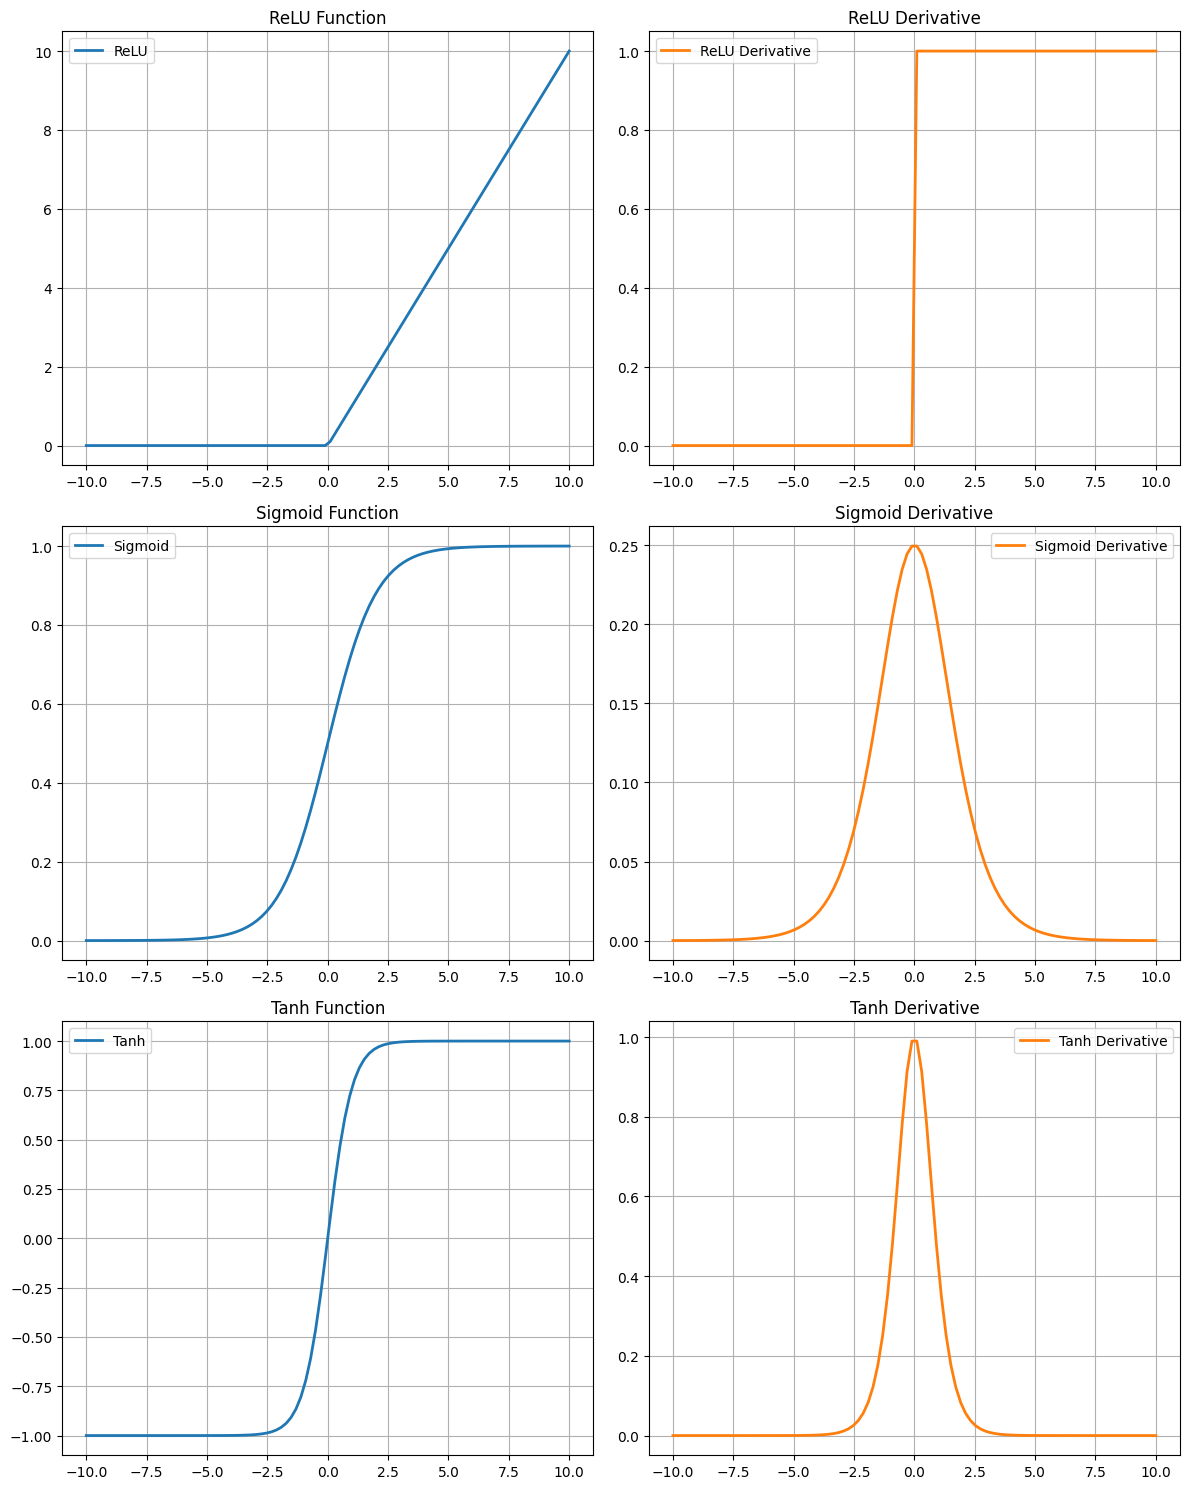

In [ ]:
x = np.linspace(-10, 10, 100)

plt.figure(figsize=(12, 15))

plt.subplot(3, 2, 1)
plt.plot(x, relu(x), linewidth=2, color = 'C0', label = 'ReLU')
plt.legend()
plt.title('ReLU Function')
plt.grid(True)
plt.subplot(3, 2, 2)
plt.plot(x, relu_derivative(x), linewidth=2, color = 'C1', label = 'ReLU Derivative')
plt.legend()
plt.title('ReLU Derivative')
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(x, sigmoid(x), linewidth=2, color = 'C0', label = 'Sigmoid')
plt.legend()
plt.title('Sigmoid Function')
plt.grid(True)
plt.subplot(3, 2, 4)
plt.plot(x, sigmoid_derivative(x), linewidth=2, color = 'C1', label = 'Sigmoid Derivative')
plt.legend()
plt.title('Sigmoid Derivative')
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(x, tanh(x), linewidth=2, color = 'C0', label = 'Tanh')
plt.legend()
plt.title('Tanh Function')
plt.grid(True)
plt.subplot(3, 2, 6)
plt.plot(x, tanh_derivative(x), linewidth=2, color = 'C1', label = 'Tanh Derivative')
plt.legend()
plt.title('Tanh Derivative')
plt.grid(True)

plt.tight_layout()
plt.show()

### 1.2 线性层

实现线性层的前向和反向传播函数，线性层包括$W\in \mathbb{R}^{C_1\times C_2}$和$b\in \mathbb{R}^{C_2}$两个参数。

前向传播函数中，对于一个输入$x\in \mathbb{R}^{N\times C_1}$，需要计算线性层的输出$y = xW + b \in \mathbb{R}^{N\times C_2}$，其中$C_1$和$C_2$分别是线性层的输入和输出维度。

反向传播函数中，给定损失函数对输出$y$的梯度$\frac{\partial L}{\partial y}\in \mathbb{R}^{N\times C_2}$，请自行推导并实现损失函数关于权重$W$、偏置$b$和输入$x$的梯度$\frac{\partial L}{\partial W}\in \mathbb{R}^{C_1\times C_2}$、$\frac{\partial L}{\partial b}\in \mathbb{R}^{C_2}$和$\frac{\partial L}{\partial x}\in \mathbb{R}^{N\times C_1}$。

In [ ]:
def linear_forward(W, b, x):
    # W: (C1, C2), b: (C2, ), x: (N, C1)
    # TODO: Compute y = xW + b
    y = x @ W + b
    
    cache = (W, b, x)
    return y, cache 

def linear_backward(dy, cache):
    # dy: (N, C2), cache: (W, b, x)
    W, b, x = cache
    
    # TODO: Compute dW: (C1, C2), db: (C2, ), dx: (N, C1)
    dW = x.T @ dy
    db = np.sum(dy, axis = 0)
    dx = dy @ W.T
    return dW, db, dx

以下代码用于测试向量维度正确性

In [57]:
N, C1, C2 = 4, 3, 2
W = np.random.randn(C1, C2)
b = np.random.randn(C2)
x = np.random.randn(N, C1)
y, cache = linear_forward(W, b, x)
assert y.shape == (N, C2)

dW, db, dx = linear_backward(np.random.randn(N, C2), cache)
assert dW.shape == (C1, C2)
assert db.shape == (C2,)
assert dx.shape == (N, C1)

以下代码用于测试数值正确性

In [58]:
N, C1, C2 = 2, 3, 2
x = np.array([[1, 2, 3],
              [4, 5, 6]])
W = np.array([[1, 0],
              [0, 1],
              [1, 1]])
b = np.array([1, 2])
y, cache = linear_forward(W, b, x)
y_expected = np.array([[ 5,  7],
                       [11, 13]])
assert np.allclose(y, y_expected)

dy = np.array([[1, 2],
               [3, 4]])
dW, db, dx = linear_backward(dy, cache)
dW_expected = np.array([[13, 18],
                        [17, 24],
                        [21, 30]])
db_expected = np.array([4, 6])
dx_expected = np.array([[1, 2, 3],
                        [3, 4, 7]])
assert np.allclose(dW, dW_expected)
assert np.allclose(db, db_expected)
assert np.allclose(dx, dx_expected)

### 1.3 损失函数

本部分中，你需要实现均方误差损失和交叉熵损失的前向和反向传播函数，函数的输入包括预测值$y_{\mathrm{pred}}\in \mathbb{R}^{N\times C}$和真实值$y_{\mathrm{truth}}\in \mathbb{R}^{N\times C}$，其中$N$是样本数，$C$是特征数或类别数；前向传播函数的输出是一个数字$L$，表示损失值；反向传播函数的输出是$\frac{\partial L}{\partial y_{\mathrm{pred}}}\in \mathbb{R}^{N\times C}$，表示损失函数对预测值的梯度。

均方误差损失的前向计算公式为 
$$
L_{\mathrm{MSE}} = \dfrac{1}{N} \sum_{i=1}^N \|y_{\mathrm{pred},i} - y_{\mathrm{truth},i}\|_2^2
$$
反向传播的公式请自行推导

交叉熵损失的前向计算公式为
$$
L_{\mathrm{CE}} = -\frac{1}{N} \sum_{i=1}^N \sum_{j=1}^C y_{\mathrm{truth},ij} \log(y_{\mathrm{pred},ij})
$$
反向传播的公式请自行推导

In [59]:
def mse_loss(y_pred, y_truth):
    # y_pred: (N, C), y_truth: (N, C)
    diff = y_pred - y_truth
    
    # TODO
    loss = np.mean(diff ** 2)
    return loss

def mse_loss_backward(y_pred, y_truth):
    # y_pred: (N, C), y_truth: (N, C)
    N = y_pred.shape[0]
    # TODO
    dy_pred = 2 * (y_pred - y_truth) / N
    return dy_pred  # (N, C)

def cross_entropy_loss(y_pred, y_truth):
    # y_pred: (N, C), y_truth: (N, C)
    
    # 限制 y_pred 的值在合理的对数函数定义域内
    eps = 1e-15
    y_pred_clipped = np.clip(y_pred, eps, 1 - eps)
    # TODO
    loss = -np.mean(np.sum(y_truth * np.log(y_pred_clipped), axis = 1))
    return loss

def cross_entropy_loss_backward(y_pred, y_truth):
    # y_pred: (N, C), y_truth: (N, C)
    
    # 限制 y_pred 的值在合理的对数函数定义域内
    eps = 1e-15
    y_pred_clipped = np.clip(y_pred, eps, 1 - eps)
    
    # TODO
    dy_pred = -np.mean(np.sum(y_truth / y_pred_clipped, axis = 1))
    return dy_pred  # (N, C)

以下代码用于验证实现的正确性

In [60]:
# MSE 测试
y_pred1 = np.array([[0.2], [0.8], [0.5]])
y_truth1 = np.array([[0.0], [1.0], [1.0]])
loss_mse = mse_loss(y_pred1, y_truth1)
dy_pred1 = mse_loss_backward(y_pred1, y_truth1)

loss_mse_expected = 0.11
assert np.isclose(loss_mse, loss_mse_expected, rtol=1e-5, atol=1e-6)
dy_pred1_expected = np.array([[0.13333333], [-0.13333333], [-0.33333333]])
assert np.isclose(loss_mse, loss_mse_expected, rtol=1e-5, atol=1e-6)

# Cross-Entropy 测试
y_pred2 = np.array([[0.1, 0.9], [0.8, 0.2]])
y_truth2 = np.array([[0, 1], [1, 0]])
loss_ce = cross_entropy_loss(y_pred2, y_truth2)
dy_pred2 = cross_entropy_loss_backward(y_pred2, y_truth2)

loss_ce_expected = 0.16425204277038574
assert np.isclose(loss_ce, loss_ce_expected, rtol=1e-5, atol=1e-6)
dy_pred2_expected = np.array([[     0, -0.5555556],
                              [-0.625,          0]])
assert np.isclose(loss_ce, loss_ce_expected, rtol=1e-5, atol=1e-6)

### 1.4 Softmax

Softmax用于将一个向量转换为概率分布，通常用于多分类任务的输出层，对于向量$z\in \mathbb{R}^C$，Softmax的输出也是一个$\mathbb{R}^C$的向量，其前向传播计算公式为
$$
\mathrm{softmax}(z)_i = \frac{e^{z_i}}{\sum_{j=1}^C e^{z_j}}, \quad i=1,2,\ldots,C
$$
对于由多个样本组成的矩阵$x\in \mathbb{R}^{N\times C}$作为输入，只需在每一行上分别运行Softmax即可。

**注意**：由于指数运算在数值上可能会导致溢出，因此在实现Softmax时需要进行数值稳定性处理，通过预先减去向量元素的最大值来控制数值范围
$$
\mathrm{softmax}(z)_i = \frac{e^{z_i-\max(z)}}{\sum_{j=1}^C e^{z_j-\max(z)}}, \quad i=1,2,\ldots,C
$$

由于Softmax通常与交叉熵损失函数在分类任务中结合使用，在实现反向传播时，可以直接计算Softmax和交叉熵损失的联合梯度，这一梯度具有十分简洁的形式。具体而言，给定$x\in \mathbb{R}^{N\times C}$和**One-Hot编码**的真实标签$y_{\mathrm{truth}}\in \mathbb{R}^{N\times C}$，损失函数
$$
L_{\mathrm{CE}} = -\frac{1}{N} \sum_{i=1}^N \sum_{j=1}^C y_{\mathrm{truth},ij} \log(\mathrm{softmax}(x)_{ij})
$$
对于$x$的梯度为
$$
\frac{\partial L_{\mathrm{CE}}}{\partial x} = \frac{1}{N}(\mathrm{softmax}(x) - y_{\mathrm{truth}})
$$
感兴趣的同学可以尝试自行推导该公式

In [ ]:
def softmax(x):
    # x: (N, C)
    # TODO
    x_exp = np.exp(x - np.max(x, axis = 1, keepdims = True))  # keepdims=True 保持维度一致，比如本来是(2, )一维, 现在变回(2, 1)两维
    softmax_x = x_exp / np.sum(x_exp, axis = 1, keepdims = True) # keepdims=True 保持维度一致
    return softmax_x   # (N, C)

def softmax_ce_backward(softmax_x, y_true):
    # softmax_x: (N, C), y_true: (N, C) one-hot
    N = softmax_x.shape[0]
    # TODO
    dx = (softmax_x - y_true) / N
    return dx   # (N, C)

以下代码用于验证实现的正确性

In [74]:
x = np.array([[1, 2, 3],
              [5, 3, 1]])
y_true = np.array([[0, 0, 1],
                   [1, 0, 0]])
softmax_x = softmax(x)
softmax_x_expected = np.array([
    [0.09003057, 0.24472847, 0.66524096],
    [0.86681333, 0.11731043, 0.01587624]
])
assert np.allclose(softmax_x, softmax_x_expected, rtol=1e-5, atol=1e-6)

dx = softmax_ce_backward(softmax_x, y_true)
dx_expected = np.array([
    [ 0.04501529, 0.12236423, -0.16737953],
    [-0.06659335, 0.05865521,  0.00793812]
])
assert np.allclose(dx, dx_expected, rtol=1e-5, atol=1e-6)

### 1.5 MNIST数据集分类

#### 1.5.1 准备数据

In [76]:
from torchvision.datasets import MNIST
data_dir = './'
train_dataset = MNIST(root=data_dir, train=True, download=True)
test_dataset = MNIST(root=data_dir, train=False, download=True)

X_train_img = train_dataset.data.numpy().astype(np.float32) / 255.0 
y_train = train_dataset.targets.numpy()

X_test_img  = test_dataset.data.numpy().astype(np.float32) / 255.0 
y_test  = test_dataset.targets.numpy()

print(X_train_img.shape, y_train.shape)
print(X_test_img.shape, y_test.shape)

100%|██████████| 9.91M/9.91M [00:12<00:00, 781kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 125kB/s]
100%|██████████| 1.65M/1.65M [00:19<00:00, 83.5kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.14MB/s]

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


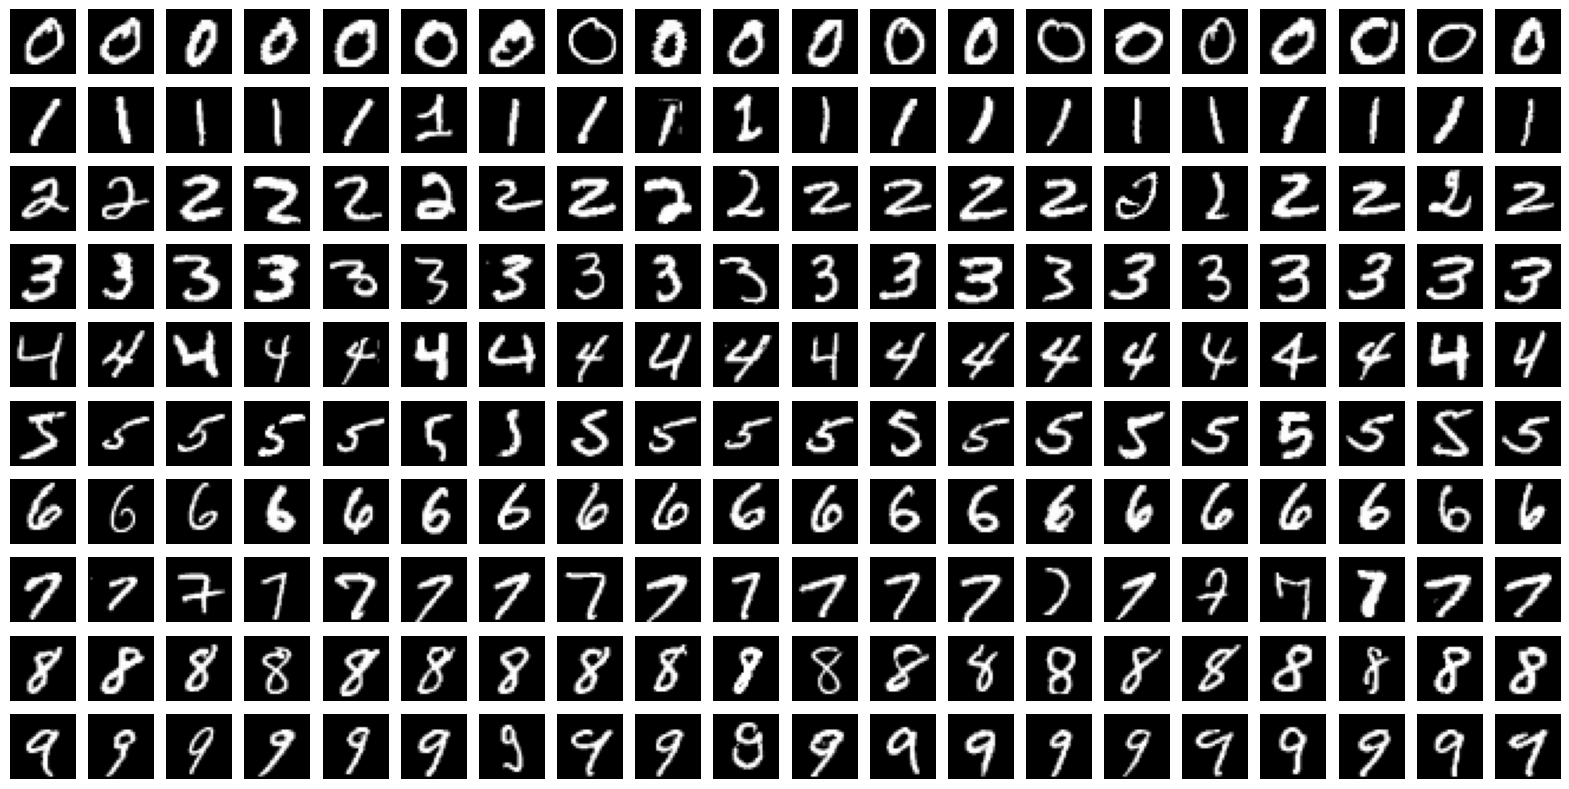

In [77]:
_, ax = plt.subplots(10, 20, figsize=(20, 10))
for i in range(10):
    img_i = np.where(y_train == i)[0]
    for j in range(20):
        ax[i, j].imshow(X_train_img[img_i[j]], cmap='gray')
        ax[i, j].axis('off')
plt.show()

In [78]:
def one_hot_encode(y, num_classes):
    N = y.shape[0]
    one_hot = np.zeros((N, num_classes), dtype=np.float32)
    one_hot[np.arange(N), y] = 1.0
    return one_hot

X_train = X_train_img.reshape(X_train_img.shape[0], -1) 
X_test  = X_test_img.reshape(X_test_img.shape[0], -1)
y_train_onehot = one_hot_encode(y_train, 10)
y_test_onehot  = one_hot_encode(y_test, 10)

print(X_train.shape, y_train.shape, y_train_onehot.shape)
print(X_test.shape, y_test.shape, y_test_onehot.shape)

(60000, 784) (60000,) (60000, 10)
(10000, 784) (10000,) (10000, 10)


#### 1.5.2 定义模型

我们使用一个简单的两层神经网络来完成MNIST数据集的分类任务。该网络包括一个线性层(784->256)和一个ReLU激活函数，后接另一个线性层(256->10)和Softmax激活函数，最后使用交叉熵计算分类损失。

In [79]:
# 定义线性层维数
input_dim = 784
hidden_dim = 256
output_dim = 10

# 初始化权重(Kaiming initialization)和偏置(Zero initialization)
generator = np.random.default_rng(42)
W1 = generator.standard_normal((input_dim, hidden_dim)) * np.sqrt(2. / input_dim)
b1 = np.zeros((1, hidden_dim))
W2 = generator.standard_normal((hidden_dim, output_dim)) * np.sqrt(2. / hidden_dim)
b2 = np.zeros((1, output_dim))

#### 1.5.3 模型训练

In [ ]:
# 定义超参数
epochs = 20
learning_rate = 0.05
batch_size = 128

# 记录训练过程中的损失函数和测试集准确率
t_losses = []
t_accs = []

for epoch in range(1, epochs + 1):
    # 每一个epoch中随机打乱训练数据
    permutation = np.random.permutation(X_train.shape[0])
    X_shuffled = X_train[permutation]
    Y_shuffled = y_train[permutation]
    Y_shuffled_onehot = y_train_onehot[permutation]
    
    epoch_loss = 0

    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_shuffled[i:i+batch_size]
        Y_batch = Y_shuffled[i:i+batch_size]
        Y_batch_onehot = Y_shuffled_onehot[i:i+batch_size]
        
        m = X_batch.shape[0]
        
        # TODO: 实现神经网络的前向传播，最终结果命名为 out
        # X_batch -> 线性层1 -> ReLU -> 线性层2 -> softmax -> out
        z1, cache1 = linear_forward(W1, b1, X_batch)
        a1 = relu(z1)
        z2, cache2 = linear_forward(W2, b2, a1)
        out = softmax(z2)
        
        # 计算损失函数
        loss = cross_entropy_loss(out, Y_batch_onehot)        
        epoch_loss += loss * m

        # TODO: 实现反向传播
        # 计算损失函数对两个线性层参数的梯度 dW1, db1, dW2, db2
        dz2 = softmax_ce_backward(out, Y_batch_onehot)
        dW2, db2, da1 = linear_backward(dz2, cache2)
        dz1 = relu_derivative(z1) * da1
        dW1, db1, dx = linear_backward(dz1, cache1)

        # TODO: 使用梯度下降法更新参数 W1, b1, W2, b2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

    # 本次epoch的平均损失
    epoch_loss /= X_train.shape[0]

    # TODO: 在测试集上进行前向计算，结果命名为 out_test
    z1_test, cache1_test = linear_forward(W1, b1, X_test)
    a1_test = relu(z1_test)
    z2_test, cache2_test = linear_forward(W2, b2, a1_test)
    out_test = softmax(z2_test)
    
    # 计算测试集的准确率
    predictions = np.argmax(out_test, axis=1)
    accuracy = np.mean(predictions == y_test)

    t_losses.append(epoch_loss)
    t_accs.append(accuracy)

    print(f"Epoch {epoch}/{epochs} - Loss: {epoch_loss:.4f} - Test Accuracy: {accuracy*100:.2f}%")

print("Training complete.")

Epoch 1/20 - Loss: 0.5749 - Test Accuracy: 90.92%
Epoch 2/20 - Loss: 0.3058 - Test Accuracy: 92.41%
Epoch 3/20 - Loss: 0.2587 - Test Accuracy: 93.11%
Epoch 4/20 - Loss: 0.2287 - Test Accuracy: 93.89%
Epoch 5/20 - Loss: 0.2062 - Test Accuracy: 94.35%
Epoch 6/20 - Loss: 0.1880 - Test Accuracy: 94.64%
Epoch 7/20 - Loss: 0.1727 - Test Accuracy: 95.15%
Epoch 8/20 - Loss: 0.1592 - Test Accuracy: 95.51%
Epoch 9/20 - Loss: 0.1483 - Test Accuracy: 95.71%
Epoch 10/20 - Loss: 0.1383 - Test Accuracy: 95.91%
Epoch 11/20 - Loss: 0.1297 - Test Accuracy: 96.14%
Epoch 12/20 - Loss: 0.1221 - Test Accuracy: 96.40%
Epoch 13/20 - Loss: 0.1154 - Test Accuracy: 96.61%
Epoch 14/20 - Loss: 0.1091 - Test Accuracy: 96.68%
Epoch 15/20 - Loss: 0.1037 - Test Accuracy: 96.86%
Epoch 16/20 - Loss: 0.0984 - Test Accuracy: 96.86%
Epoch 17/20 - Loss: 0.0939 - Test Accuracy: 97.02%
Epoch 18/20 - Loss: 0.0897 - Test Accuracy: 97.13%
Epoch 19/20 - Loss: 0.0856 - Test Accuracy: 97.11%
Epoch 20/20 - Loss: 0.0823 - Test Accura

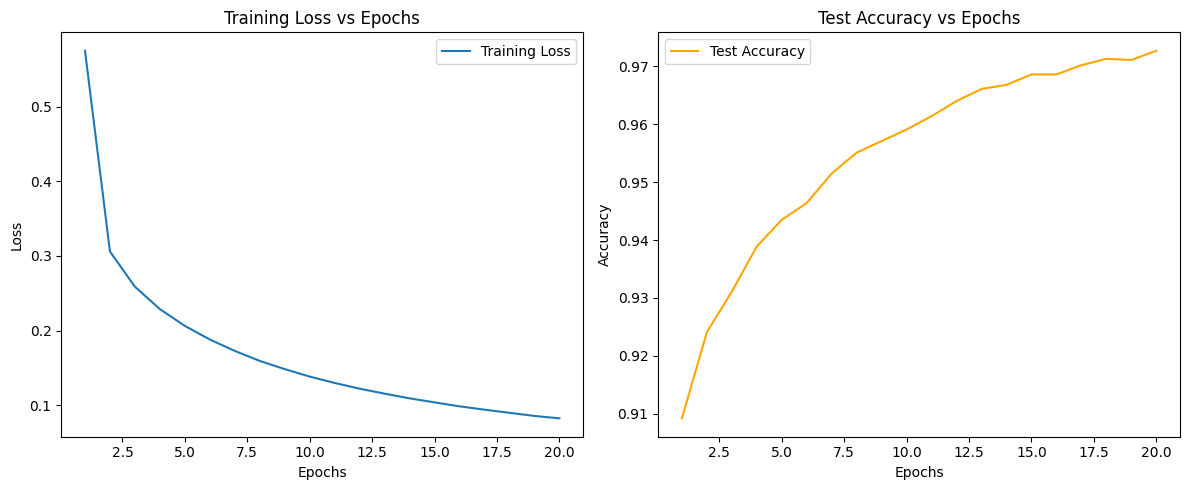

In [81]:
# 绘制训练曲线

epoch_list = np.arange(1, epochs + 1)

_, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(epoch_list, t_losses, label='Training Loss')
ax[0].set_title('Training Loss vs Epochs')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(epoch_list, t_accs, label='Test Accuracy', color='orange')
ax[1].set_title('Test Accuracy vs Epochs')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.tight_layout()
plt.show()

#### 1.5.4 模型评测

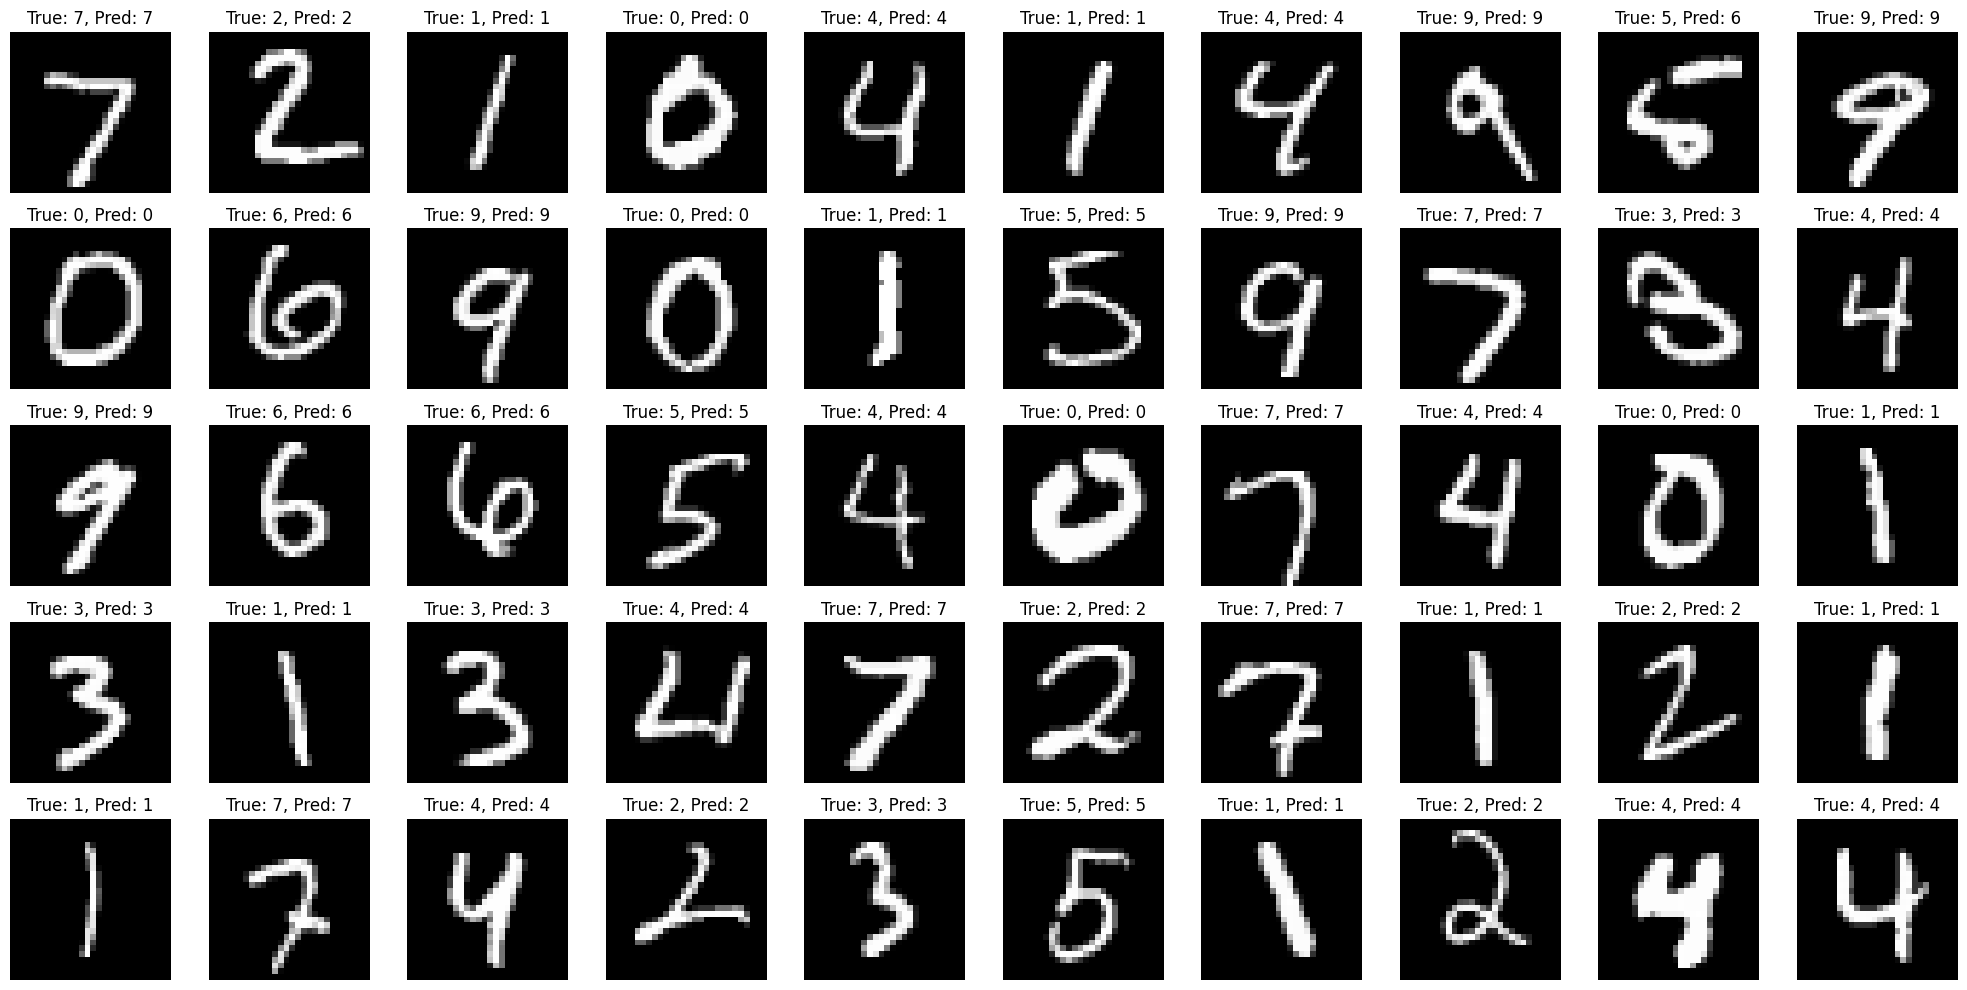

In [82]:
# TODO: 在测试集上预测标签
# 结果命名为 predictions，是一个(N_test, )的范围0~9的整型向量
z1_test, cache1_test = linear_forward(W1, b1, X_test)
a1_test = relu(z1_test)
z2_test, cache2_test = linear_forward(W2, b2, a1_test)
out_test = softmax(z2_test)
predictions = np.argmax(out_test, axis = 1)
# 绘制预测结果
_, ax = plt.subplots(5, 10, figsize=(20, 10))
ax = ax.flatten()
for i in range(50):
    ax[i].imshow(X_test_img[i], cmap='gray')
    ax[i].set_title(f'True: {y_test[i]}, Pred: {predictions[i]}')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

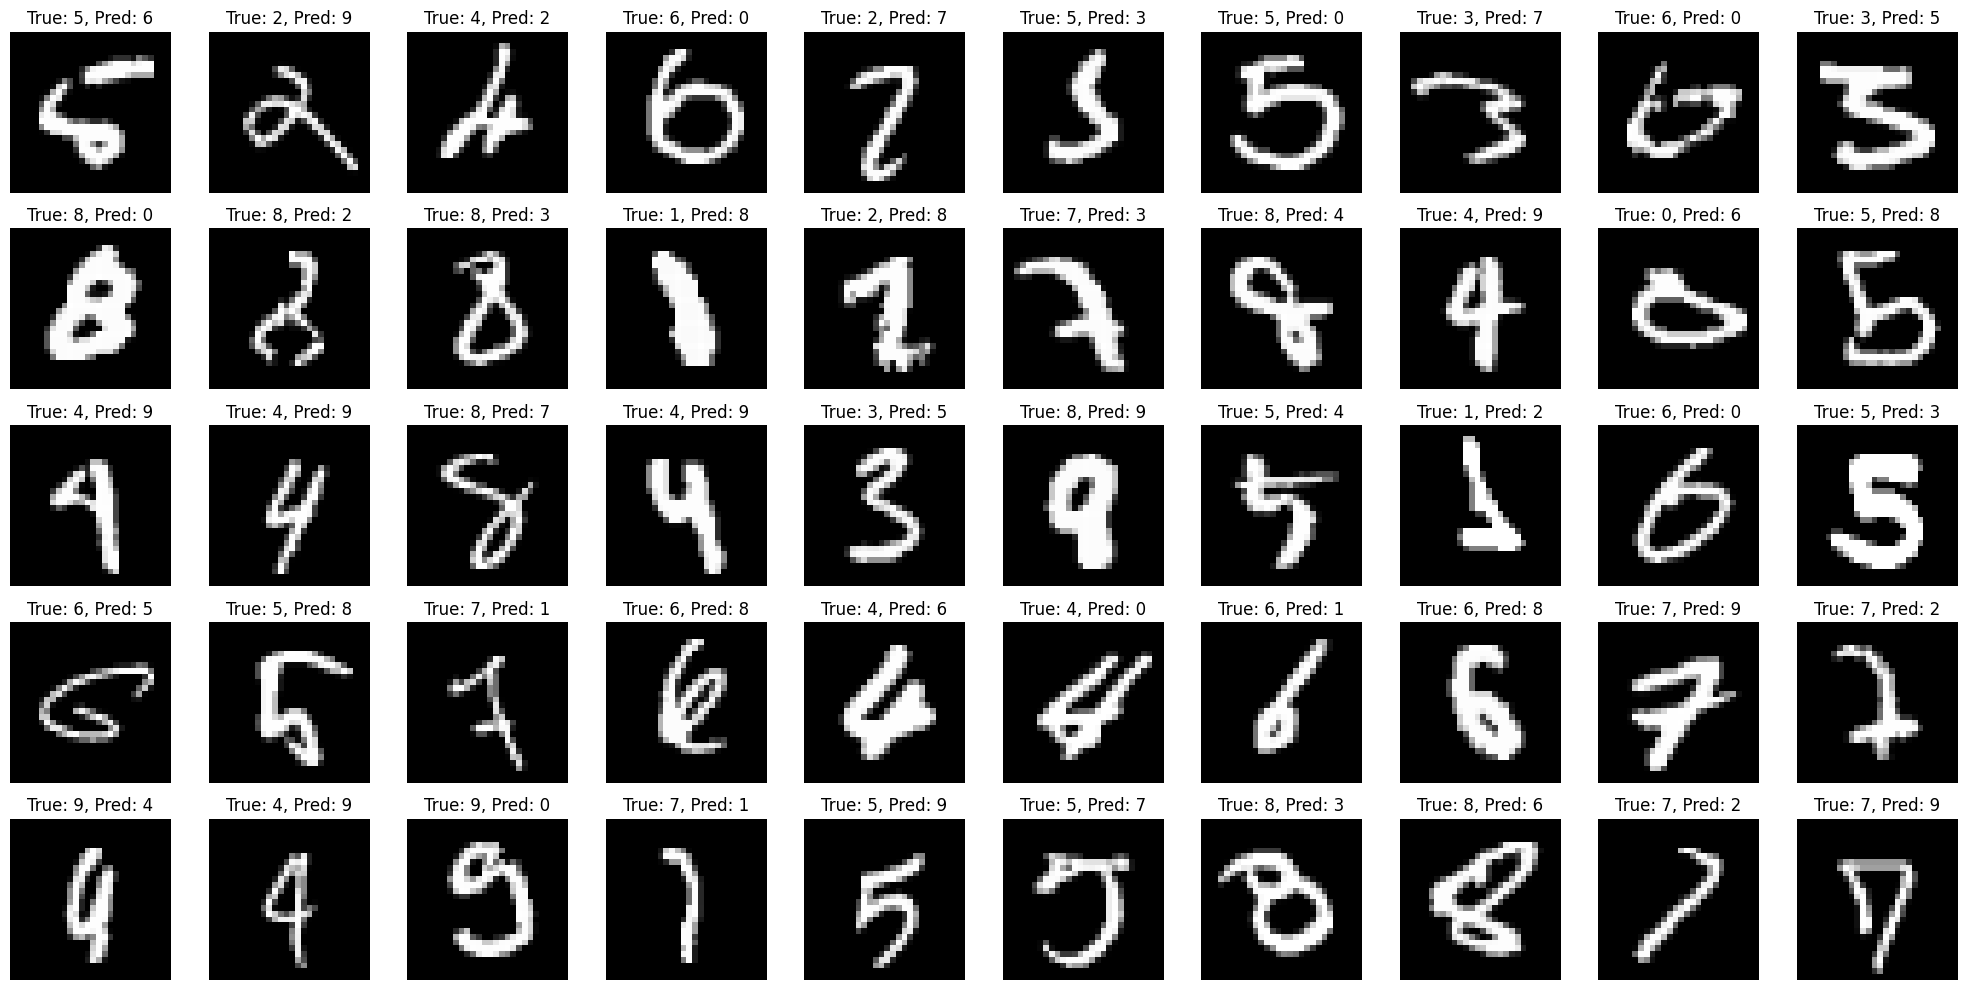

In [83]:
# 观察预测错误的样本
_, ax = plt.subplots(5, 10, figsize=(20, 10))
ax = ax.flatten()
wrong_indices = np.where(predictions != y_test)[0]
for i in range(50):
    ax[i].imshow(X_test_img[wrong_indices[i]], cmap='gray')
    ax[i].set_title(f'True: {y_test[wrong_indices[i]]}, Pred: {predictions[wrong_indices[i]]}')
    ax[i].axis('off')
plt.tight_layout()
plt.show()